In [55]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio


import pyreadstat

In [2]:
df_2018 = pd.read_csv('/Users/syshin/Desktop/Himedia/Himedia_project/문화체육관광부/2018 국내여행/2018_전처리 최종 .csv', encoding='utf-8', index_col=0)
df_2018

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8929,2018.0,21090,1,2,"1,3",2.0,0.0,263111.111111,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8930,2018.0,36010,1,2,"1,3",3.0,1.0,140945.674044,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8931,2018.0,39010,1,1,11,3.0,1.0,45283.018868,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8932,2018.0,39010,1,0,0,5.0,0.0,30000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_2019 = pd.read_csv('./2019 국내여행/2019_split버전.csv', encoding='utf-8', index_col=0)
df_2019

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2019.0,36460,1,2,2,12.0,0.0,250000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,21090,1,2,9,6.0,0.0,217000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,31370,1,2,3,3.0,1.0,348000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,36360,1,2,1,3.0,0.0,43000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,25040,1,0,0,3.0,0.0,200000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18140,2019.0,11030,1,1,1,20.0,0.0,300000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18141,2019.0,"39010,11230,39010,39010",4,"3,2,2,3",1,5.0,0.0,212000.0,NaN,4.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
18143,2019.0,39010,1,0,0,2.0,0.0,100000.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18144,2019.0,11210,1,2,1,12.0,0.0,300000.0,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_2020 = pd.read_csv('./2020 국내여행/2020_split버전.csv', encoding='utf-8', index_col=0)
df_2020

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2020.0,"23310,23310",2,1,3,2.0,0.0,439000.0,219500.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,31160,1,0,0,4.0,0.0,70002.0,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.0,31110,1,0,0,3.0,0.0,74500.0,26500.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020.0,"23080,31270",2,"0,0",NaN,2.0,0.0,100000.0,50000.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020.0,"32400,32390",2,1,11,4.0,0.0,400000.0,100000.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.0,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11940,2020.0,39010,1,0,0,1.0,NaN,10000.0,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11941,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.0,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11942,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.0,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.concat([df_2018, df_2019, df_2020])
df

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11939,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.000000,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11940,2020.0,39010,1,0,0,1.0,NaN,10000.000000,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11941,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.000000,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11942,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.000000,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.reset_index(inplace=True, drop=True)

In [7]:
df

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,...,accommodation_5,accommodation_6,accommodation_7,accommodation_8,accommodation_9,accommodation_10,accommodation_11,accommodation_12,accommodation_13,accommodation_14
0,2018.0,34360,1,0,0,33.0,0.0,57200.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.0,31350,1,0,0,5.0,0.0,90000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.0,36360,1,1,1,5.0,0.0,42003.514938,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018.0,31370,1,0,0,2.0,0.0,50000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.0,32340,1,1,1,5.0,0.0,198000.000000,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,2020.0,"39010,39010",2,"0,0",NaN,3.0,0.0,40000.000000,40000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37715,2020.0,39010,1,0,0,1.0,NaN,10000.000000,10000.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37716,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.000000,23334.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37717,2020.0,"39010,39010",2,"0,0",NaN,7.0,3.0,190007.000000,28751.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.loc[0,'sleepnights']

'0'

In [9]:
for index in df.index:
  target_list_index = df.loc[index,'sleepnights'].split(',')
  for i, targets in enumerate(target_list_index):
       t_col = 'sleepnights_'+str(i+1)
       df.loc[index,t_col]= targets

In [10]:
df.columns

Index(['year', 'target_area', 'no_of_place', 'sleepnights', 'accommodation',
       'number_of_ppl', 'number_of_children', 'cost_total_trip',
       'cost_total_per_person', 'satisfied', 'sex', 'age', 'month',
       'living_area', 'target_beforesplit', 'transportation', 'reason',
       'relationship_beforesplit', 'relationship1', 'relationship2',
       'relationship3', 'target_1', 'target_2', 'target_3', 'target_4',
       'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
       'target_11', 'target_12', 'target_14', 'target_15', 'target_16',
       'target_17', 'target_area1', 'target_area2', 'target_area3',
       'target_area4', 'target_area5', 'target_area6', 'target_area7',
       'target_area8', 'target_area9', 'target_area10', 'target_area11',
       'transportation1', 'transportation2', 'transportation3', 'reason1',
       'reason2', 'reason3', 'accommodation_1', 'accommodation_2',
       'accommodation_3', 'accommodation_4', 'accommodation_5',
       

In [11]:
df = df[[
    'year',
    'target_area1', 
    'target_area2', 'target_area3', 'target_area4', 'target_area5', 'target_area6', 'target_area7',
    'target_area8', 'target_area9', 'target_area10', 'target_area11',
    'no_of_place',
    'sleepnights_1', 'sleepnights_2', 'sleepnights_3', 'sleepnights_4',
       'sleepnights_5', 'sleepnights_6', 'sleepnights_7', 'sleepnights_8', 
    'accommodation_1', 'accommodation_2','accommodation_3', 'accommodation_4', 'accommodation_5','accommodation_6', 'accommodation_7', 'accommodation_8',
    'accommodation_9', 'accommodation_10', 'accommodation_11', 'accommodation_12', 'accommodation_13', 'accommodation_14',
    'number_of_ppl', 
    'number_of_children', 
    'cost_total_trip',
    'satisfied', 
    'sex', 
    'age', 
    'month', 
    'living_area',
    'transportation1', 'transportation2', 'transportation3',
    'reason1', 'reason2', 'reason3',
    'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17',
    'relationship1', 'relationship2', 'relationship3'
]]

In [12]:
df

,year,target_area1,target_area2,target_area3,target_area4,target_area5,target_area6,target_area7,target_area8,target_area9,...,target_10,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3
0,2018.0,34360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN
1,2018.0,31350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
2,2018.0,36360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
3,2018.0,31370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,NaN
4,2018.0,32340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37714,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
37715,2020.0,39010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37716,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
37717,2020.0,39010,39010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN


In [13]:
df = df[df.loc[:,['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']].sum(axis=1)==1]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 68 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5155 non-null   float64
 1   target_area1        5157 non-null   int64  
 2   target_area2        536 non-null    float64
 3   target_area3        75 non-null     float64
 4   target_area4        18 non-null     float64
 5   target_area5        6 non-null      float64
 6   target_area6        2 non-null      float64
 7   target_area7        2 non-null      float64
 8   target_area8        1 non-null      float64
 9   target_area9        0 non-null      float64
 10  target_area10       0 non-null      float64
 11  target_area11       0 non-null      float64
 12  no_of_place         5157 non-null   int64  
 13  sleepnights_1       5157 non-null   object 
 14  sleepnights_2       345 non-null    object 
 15  sleepnights_3       41 non-null     object 
 16  slee

In [15]:
df = df[[
    'year',
    'target_area1', 
    # 'target_area2', 'target_area3', 'target_area4', 'target_area5', 'target_area6', 'target_area7',
    # 'target_area8', 'target_area9', 'target_area10', 'target_area11',
    'no_of_place',
    'sleepnights_1', 
    # 'sleepnights_2', 'sleepnights_3', 'sleepnights_4','sleepnights_5', 'sleepnights_6', 'sleepnights_7', 'sleepnights_8', 
    'accommodation_1', 'accommodation_2','accommodation_3', 'accommodation_4', 'accommodation_5','accommodation_6', 'accommodation_7', 'accommodation_8',
    'accommodation_9', 'accommodation_10', 'accommodation_11', 'accommodation_12', 'accommodation_13', 'accommodation_14',
    'number_of_ppl', 
    'number_of_children', 
    'cost_total_trip',
    'satisfied', 
    'sex', 
    'age', 
    'month', 
    'living_area',
    'transportation1', 'transportation2', 'transportation3',
    'reason1', 'reason2', 'reason3',
    'target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17',
    'relationship1', 'relationship2', 'relationship3'
]]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                5155 non-null   float64
 1   target_area1        5157 non-null   int64  
 2   no_of_place         5157 non-null   int64  
 3   sleepnights_1       5157 non-null   object 
 4   accommodation_1     1496 non-null   float64
 5   accommodation_2     613 non-null    float64
 6   accommodation_3     105 non-null    float64
 7   accommodation_4     26 non-null     float64
 8   accommodation_5     10 non-null     float64
 9   accommodation_6     5 non-null      float64
 10  accommodation_7     3 non-null      float64
 11  accommodation_8     2 non-null      float64
 12  accommodation_9     0 non-null      float64
 13  accommodation_10    0 non-null      float64
 14  accommodation_11    0 non-null      float64
 15  accommodation_12    0 non-null      float64
 16  acco

In [17]:
df[df['accommodation_14'].notnull()].head(60)

,year,target_area1,no_of_place,sleepnights_1,accommodation_1,accommodation_2,accommodation_3,accommodation_4,accommodation_5,accommodation_6,...,target_10,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3


In [18]:
df = df.fillna(0)

In [19]:
cols = df.columns

In [20]:
df = df.astype('int64')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 18 to 37716
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   year                5157 non-null   int64
 1   target_area1        5157 non-null   int64
 2   no_of_place         5157 non-null   int64
 3   sleepnights_1       5157 non-null   int64
 4   accommodation_1     5157 non-null   int64
 5   accommodation_2     5157 non-null   int64
 6   accommodation_3     5157 non-null   int64
 7   accommodation_4     5157 non-null   int64
 8   accommodation_5     5157 non-null   int64
 9   accommodation_6     5157 non-null   int64
 10  accommodation_7     5157 non-null   int64
 11  accommodation_8     5157 non-null   int64
 12  accommodation_9     5157 non-null   int64
 13  accommodation_10    5157 non-null   int64
 14  accommodation_11    5157 non-null   int64
 15  accommodation_12    5157 non-null   int64
 16  accommodation_13    5157 non-null   int6

In [22]:
df[df['target_1'] + df['target_2'] + df['target_3'] + df['target_4'] + df['target_5'] + df['target_6'] + df['target_7']
   + df['target_8']+ df['target_9']+ df['target_10']+ df['target_11']+ df['target_12']+ df['target_14'] + df['target_15']
   + df['target_16']+ df['target_17']==2]

,year,target_area1,no_of_place,sleepnights_1,accommodation_1,accommodation_2,accommodation_3,accommodation_4,accommodation_5,accommodation_6,...,target_10,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3


In [23]:
df1=df[df.loc[:,['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']].sum(axis=1)==1]
df1[['target_1', 'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7', 'target_8', 'target_9', 'target_10',
    'target_11', 'target_12', 'target_14', 'target_15', 'target_16', 'target_17']]

,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8,target_9,target_10,target_11,target_12,target_14,target_15,target_16,target_17
18,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
21,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
22,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37702,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37712,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
37713,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
37715,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [24]:
for index in df1.index:
    if df1.loc[index, ['target_1', 'target_6', 'target_7']].sum()==1:
        df1.loc[index, 'target']='힐링,호캉스'
    elif df1.loc[index,['target_3', 'target_5', 'target_8', 'target_12', 'target_17']].sum()==1:
        df1.loc[index, 'target']='엑티비티'
    elif df1.loc[index, ['target_2']].sum()==1:
        df1.loc[index, 'target']='식도락,맛집투어'
    else:
        df1.loc[index, 'target']='축제,관광'

In [25]:
df1.reset_index(inplace=True, drop=True)

In [26]:
df1['target'].value_counts()

힐링,호캉스      3397
엑티비티         850
식도락,맛집투어     584
축제,관광        326
Name: target, dtype: int64

In [27]:
df1

,year,target_area1,no_of_place,sleepnights_1,accommodation_1,accommodation_2,accommodation_3,accommodation_4,accommodation_5,accommodation_6,...,target_11,target_12,target_14,target_15,target_16,target_17,relationship1,relationship2,relationship3,target
0,2018,99999,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
1,2018,32390,1,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
2,2018,31370,1,1,11,0,0,0,0,0,...,0,0,0,0,0,1,3,0,0,엑티비티
3,2018,31370,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"힐링,호캉스"
4,2018,99999,1,2,5,5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"힐링,호캉스"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5152,2020,39020,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,엑티비티
5153,2020,39010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,엑티비티
5154,2020,21070,1,2,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,엑티비티
5155,2020,39010,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"힐링,호캉스"


In [28]:
df1['target']=df1['target'].astype('category')

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   year                5157 non-null   int64   
 1   target_area1        5157 non-null   int64   
 2   no_of_place         5157 non-null   int64   
 3   sleepnights_1       5157 non-null   int64   
 4   accommodation_1     5157 non-null   int64   
 5   accommodation_2     5157 non-null   int64   
 6   accommodation_3     5157 non-null   int64   
 7   accommodation_4     5157 non-null   int64   
 8   accommodation_5     5157 non-null   int64   
 9   accommodation_6     5157 non-null   int64   
 10  accommodation_7     5157 non-null   int64   
 11  accommodation_8     5157 non-null   int64   
 12  accommodation_9     5157 non-null   int64   
 13  accommodation_10    5157 non-null   int64   
 14  accommodation_11    5157 non-null   int64   
 15  accommodation_12    5157 non-null   in

In [30]:
df1.drop(columns=['target_1',
       'target_2', 'target_3', 'target_4', 'target_5', 'target_6', 'target_7',
       'target_8', 'target_9', 'target_10', 'target_11', 'target_12',
       'target_14', 'target_15', 'target_16', 'target_17'], inplace=True)

In [31]:
category_list = ['accommodation_1', 'accommodation_2', 'accommodation_3',
       'accommodation_4', 'accommodation_5', 'accommodation_6',
       'accommodation_7', 'accommodation_8', 'accommodation_9',
       'accommodation_10', 'accommodation_11', 'accommodation_12',
       'accommodation_13', 'accommodation_14','transportation1', 'transportation2',
       'transportation3', 'reason1', 'reason2', 'reason3', 'relationship1',
       'relationship2', 'relationship3', 'sex', 'year', 'target_area1', 'month', 'living_area']

In [32]:
df1[category_list] = df1[category_list].astype('category')

In [108]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   year                5157 non-null   category
 1   target_area1        5157 non-null   category
 2   no_of_place         5157 non-null   int64   
 3   sleepnights_1       5157 non-null   int64   
 4   accommodation_1     5157 non-null   category
 5   accommodation_2     5157 non-null   category
 6   accommodation_3     5157 non-null   category
 7   accommodation_4     5157 non-null   category
 8   accommodation_5     5157 non-null   category
 9   accommodation_6     5157 non-null   category
 10  accommodation_7     5157 non-null   category
 11  accommodation_8     5157 non-null   category
 12  accommodation_9     5157 non-null   category
 13  accommodation_10    5157 non-null   category
 14  accommodation_11    5157 non-null   category
 15  accommodation_12    5157 non-null   ca

In [91]:
df1.columns

Index(['year', 'target_area1', 'no_of_place', 'sleepnights_1',
       'accommodation_1', 'accommodation_2', 'accommodation_3',
       'accommodation_4', 'accommodation_5', 'accommodation_6',
       'accommodation_7', 'accommodation_8', 'accommodation_9',
       'accommodation_10', 'accommodation_11', 'accommodation_12',
       'accommodation_13', 'accommodation_14', 'number_of_ppl',
       'number_of_children', 'cost_total_trip', 'satisfied', 'sex', 'age',
       'month', 'living_area', 'transportation1', 'transportation2',
       'transportation3', 'reason1', 'reason2', 'reason3', 'relationship1',
       'relationship2', 'relationship3', 'target'],
      dtype='object')

In [92]:
data = ['year', 'target_area1', 'no_of_place', 'sleepnights_1',
       'accommodation_1', 'accommodation_2', 'accommodation_3',
       'accommodation_4', 'accommodation_5', 'accommodation_6',
       'accommodation_7', 'accommodation_8', 'accommodation_9',
       'accommodation_10', 'accommodation_11', 'accommodation_12',
       'accommodation_13', 'accommodation_14', 'number_of_ppl',
       'number_of_children', 'cost_total_trip', 'satisfied', 'sex', 'age',
       'month', 'living_area', 'transportation1', 'transportation2',
       'transportation3', 'reason1', 'reason2', 'reason3', 'relationship1',
       'relationship2', 'relationship3']
target = 'target'

In [59]:
X_train,X_test,y_train,y_test=train_test_split(
    df1.iloc[:,:-1],
    df1.iloc[:,-1:],
    random_state=42,
    test_size=0.2)

In [60]:
dtree = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=8, 
    max_features=32,
    random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(
    C=0.1, 
    gamma=0.003,
          
    probability=True,
    random_state=35
).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [61]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.6695736434108527
knn   :  0.6608527131782945
svm   :  0.6608527131782945


In [62]:
dtree_proba = dtree.predict_proba(X_test)
print(dtree_proba[0:2])

[[0.52941176 0.         0.         0.47058824]
 [0.64285714 0.         0.07142857 0.28571429]]


In [63]:
knn_proba = knn.predict_proba(X_test)
print(knn_proba[0:2])


[[0.14046823 0.15384615 0.05685619 0.64882943]
 [0.11705686 0.09698997 0.08361204 0.70234114]]


In [64]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[0.11223356 0.16642381 0.06399637 0.65734626]
 [0.11223356 0.16642381 0.06399637 0.65734626]]


In [65]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
hard_vote = accuracy_score(y_test, hard_voting_predicted)

In [66]:
hard_vote

0.6608527131782945

In [67]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
soft_vote = accuracy_score(y_test, soft_voting_predicted)

In [68]:
soft_vote

0.6695736434108527

In [69]:
xlist = ['knn', 'svm', 'dtree', 'hard', 'soft']
ylist = [accuracy_score(y_test, knn_predicted), accuracy_score(y_test, svm_predicted), accuracy_score(y_test, dtree_predicted), hard_vote, soft_vote]

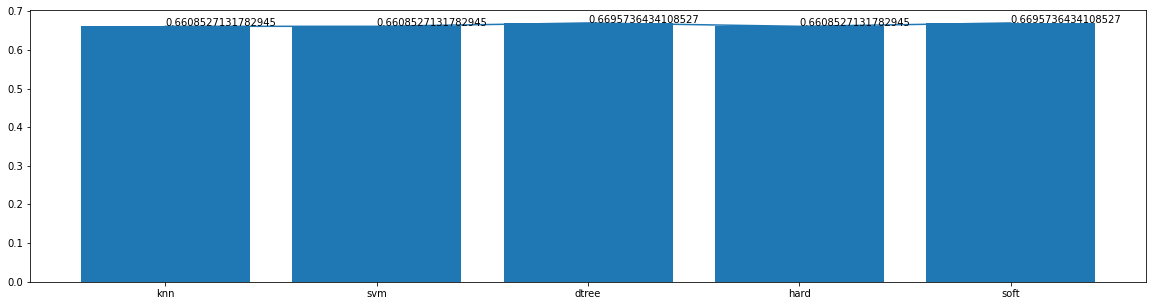

In [70]:
plt.figure(figsize=(20,5))
plt.bar(xlist,ylist)
plt.plot(xlist,ylist)
for a,b in zip(xlist, ylist): 
    plt.text(a, b, str(b))
plt.show()

In [71]:
importance = dtree.feature_importances_

In [75]:
model_list = []
LR = LogisticRegression()
NB = GaussianNB()
RF = RandomForestClassifier()
SVC = SVC()
Dtree = DecisionTreeClassifier()
XGB = XGBClassifier()
KNN = KNeighborsClassifier()
model_list.append(("LR",LR))
model_list.append(("NB",NB))
model_list.append(("RF",RF))
model_list.append(("SVC",SVC))
model_list.append(("Dtree",Dtree))
model_list.append(("XGB",XGB))
model_list.append(("KNN",KNN))
model_list

[('LR', LogisticRegression()),
 ('NB', GaussianNB()),
 ('RF', RandomForestClassifier()),
 ('SVC', SVC()),
 ('Dtree', DecisionTreeClassifier()),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=100, n_jobs=None,
                num_parallel_tree=None, predictor=None, random_state=None,
                reg_alpha=None, reg_lambda=None, ...)),
 ('KNN', KNeighborsClassifier())]

In [76]:
def print_cv(model, X_train, y_train, k):
    scores = cross_val_score(model, X_train, y_train, cv = k)
    print(i, k, '----교차검증시작----')
    print('결과:', scores)
    mean_scores = np.mean(scores)
    print('평균:', mean_scores)
    return scores, mean_scores 
# 함수의 결과로 여러개의 데이터를 return
# 튜플로 묶어서 반환하게 된다.(scores, mean_scores)

In [77]:
k_number=[5, 10]
sc_list = []
mean_sc_list = []
for i, model in model_list:
    for k in k_number:
        sc, mean_sc = print_cv(model, X_train, y_train, k)
        sc_list.append(sc)
        mean_sc_list.append(mean_sc)
    print()
print('**********************************************************************************************************************')
print()
print()
print('모델명:', model_list,'k:', k_number)
print()
print()
print('전체 모델의 교차 검증 결과 리스트:')
print(sc_list)
print('전체 모델의 교차 검증 결과 평균:')
print(mean_sc_list)
print()
# 최대 평균값 ==
mean_sc_list_nan = []
for i in mean_sc_list:
    if np.isnan(i):
        pass
    else:
        mean_sc_list_nan.append(i)
max_value = np.max(mean_sc_list_nan)
# 최대 평균값 인덱스 ==


max_index = np.nanargmax(mean_sc_list)
# 최대 평균값 모델명 ==
max_model = model_list[max_index//2][0]
if max_index%2 ==0:
    k_max = 5
else:
    k_max = 10

print('최고 교차 검증 평균>> ', max_value)
print('최고 교차 검증 인덱스>> ', max_index)
print('최고 교차 검증 모델링>> ', max_model, 'k =', k_max)



LR 5 ----교차검증시작----
결과: [0.66060606 0.66545455 0.6569697  0.66909091 0.65939394]
평균: 0.6623030303030303
LR 10 ----교차검증시작----
결과: [0.65375303 0.66101695 0.66828087 0.65375303 0.6440678  0.65776699
 0.66504854 0.66262136 0.66019417 0.66019417]
평균: 0.6586696913420625

NB 5 ----교차검증시작----
결과: [0.19272727 0.19515152 0.19636364 0.19878788 0.21212121]
평균: 0.19903030303030303
NB 10 ----교차검증시작----
결과: [0.18159806 0.19612591 0.21307506 0.18644068 0.20823245 0.16990291
 0.19660194 0.21359223 0.2038835  0.23786408]
평균: 0.20073168151578552

RF 5 ----교차검증시작----
결과: [0.70909091 0.71272727 0.70666667 0.71393939 0.71030303]
평균: 0.7105454545454546
RF 10 ----교차검증시작----
결과: [0.69733656 0.71912833 0.73849879 0.70702179 0.72397094 0.69174757
 0.75       0.70145631 0.70145631 0.72572816]
평균: 0.7156344765979454

SVC 5 ----교차검증시작----
결과: [0.65818182 0.65818182 0.65818182 0.6569697  0.65818182]
평균: 0.657939393939394
SVC 10 ----교차검증시작----
결과: [0.65859564 0.65859564 0.65859564 0.65859564 0.65859564 0.65776699
 0.

In [79]:
def grid_search(model, params, k):
    gs_model = GridSearchCV(model, params, cv=k)
    ## gs_model는 최적의 파라메터가 적요된 모델의 객체!
    gs_model.fit(X_train, y_train)
    print('best_estimator:',gs_model.best_estimator_) ##최적의 파라메터가 적용된 모델 객체
    print('best_score:',gs_model.best_score_) ##최적의 파라메터가 적용된 모델로 학습한 정확도 결과(acc)
    print('best_params:',gs_model.best_params_) ##최적의 파라메터
    print('gs_model:',gs_model) #grid_search 객체
    return gs_model.best_estimator_

In [80]:
params = { #하이퍼파라메터 설정으로 가질 수 있는 모든 경우의 수=> 4*3*2: 24
    'max_depth':[3, 5, 7, 10], #key:하이퍼파라메터명, values는 list
    'random_state': [1,3,5],
    'criterion': ['gini','entropy'] #혼란스러운 정도(분류의 정도)를 계산하는 기준
}
best_model = []

for i, model in model_list:
    try:
        print('----clf model:', model, '----')
        best_model.append(grid_search(model, params, 10))
        print()
    except Exception as e:
        print(e)
        print()
print('=====================best_model:', best_model)

----clf model: LogisticRegression() ----
Invalid parameter criterion for estimator LogisticRegression(). Check the list of available parameters with `estimator.get_params().keys()`.

----clf model: GaussianNB() ----
Invalid parameter criterion for estimator GaussianNB(). Check the list of available parameters with `estimator.get_params().keys()`.

----clf model: RandomForestClassifier() ----
best_estimator: RandomForestClassifier(max_depth=10, random_state=3)
best_score: 0.7054538188485859
best_params: {'criterion': 'gini', 'max_depth': 10, 'random_state': 3}
gs_model: GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'random_state': [1, 3, 5]})

----clf model: SVC() ----
Invalid parameter criterion for estimator SVC(). Check the list of available parameters with `estimator.get_params().keys()`.

----clf model: DecisionTreeClassifier() ----
best

In [81]:
## 최적의 하이퍼 파라메터로 모델 객체 생성
## fit()
dt_gs = DecisionTreeClassifier(criterion = 'gini', max_depth=10, random_state=3)
dt_gs.fit(X_train, y_train)
rf_gs = RandomForestClassifier(criterion = 'entropy', max_depth=10, random_state=3)
rf_gs.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=3)

In [82]:
for i , model in model_list:
    print(i)
    print(model)

LR
LogisticRegression()
NB
GaussianNB()
RF
RandomForestClassifier()
SVC
SVC()
Dtree
DecisionTreeClassifier()
XGB
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
KNN
KNeighborsClassifier()


In [83]:
## 테스트 데이터로 검증해보자!
def test_validation(model, X_test, y_test):
    predict_result = model.predict(X_test)
    acc = accuracy_score(y_test, predict_result)
    print("accuracy:", acc)
    cf = confusion_matrix(y_test, predict_result)
    ##실제(c) --> 예측(c, sg), 실제(sg)==> 예측(sg,c),
    # 이진분류(binary classification)인 경우에는
    # 예측할 수 있는 경우의 수는 4가지!
    # 4가지를 표형태로 정리해주는 것이 confusion matrix!
    # 첫반째 행/열은 c, 두번째 행/열은 sg, abc순으로 행/열이 결정
    print('confusion_matrix:\n', cf)
    ## confusion matrix는 binary classfication 인 경우에는 보기가 괜찮으나, 
    ## multi class classification인 경우에는 보기가 힘들어서
    ## classification_report 를 사용하는게 보기 편하다
    c_report = classification_report(y_test, predict_result)
    print('classification_report:\n', c_report)

test_validation(rf_gs, X_test, y_test)

accuracy: 0.6918604651162791
confusion_matrix:
 [[  1   3   0 121]
 [  1  39   0 123]
 [  0   2   0  60]
 [  0   8   0 674]]
classification_report:
               precision    recall  f1-score   support

    식도락,맛집투어       0.50      0.01      0.02       125
        엑티비티       0.75      0.24      0.36       163
       축제,관광       0.00      0.00      0.00        62
      힐링,호캉스       0.69      0.99      0.81       682

    accuracy                           0.69      1032
   macro avg       0.48      0.31      0.30      1032
weighted avg       0.63      0.69      0.60      1032



In [84]:
test_validation(rf_gs, X_test, y_test)

accuracy: 0.6918604651162791
confusion_matrix:
 [[  1   3   0 121]
 [  1  39   0 123]
 [  0   2   0  60]
 [  0   8   0 674]]
classification_report:
               precision    recall  f1-score   support

    식도락,맛집투어       0.50      0.01      0.02       125
        엑티비티       0.75      0.24      0.36       163
       축제,관광       0.00      0.00      0.00        62
      힐링,호캉스       0.69      0.99      0.81       682

    accuracy                           0.69      1032
   macro avg       0.48      0.31      0.30      1032
weighted avg       0.63      0.69      0.60      1032



In [85]:
dt_gs.feature_importances_

array([0.0146285 , 0.30337712, 0.0126301 , 0.01290038, 0.01294162,
       0.00625388, 0.00170808, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.02797012, 0.01214803,
       0.08980108, 0.01944794, 0.00233737, 0.06608005, 0.06586529,
       0.07307608, 0.01142418, 0.0179099 , 0.00626447, 0.15020275,
       0.04319366, 0.01856278, 0.02954395, 0.00173266, 0.        ])

<BarContainer object of 35 artists>

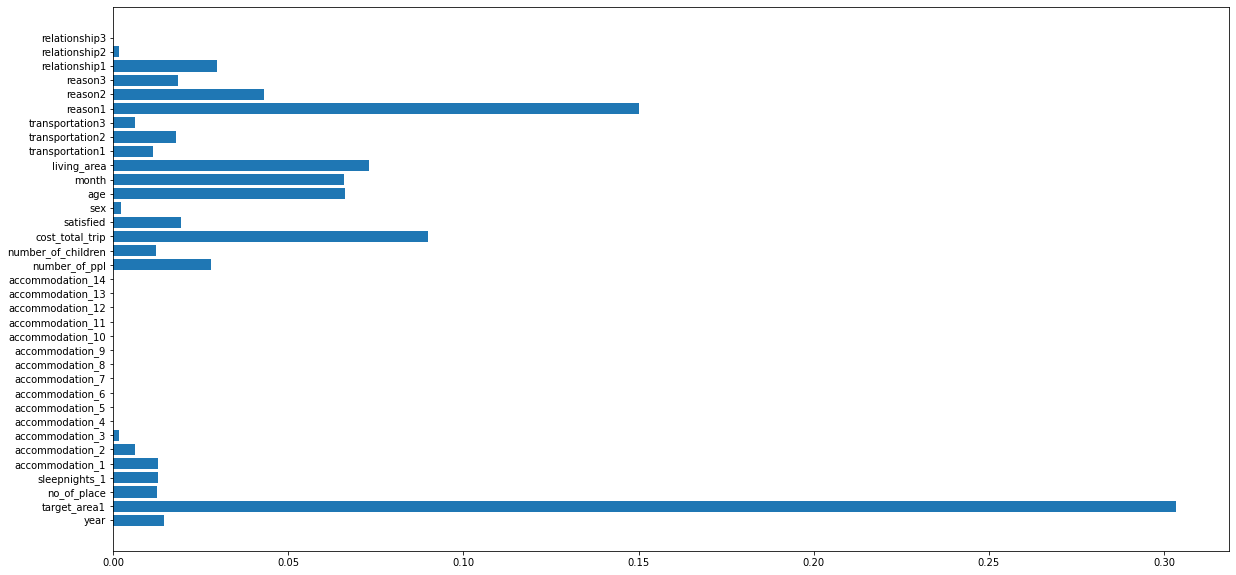

In [97]:
plt.figure(figsize=(20,10))
plt.barh(data, dt_gs.feature_importances_)

In [100]:
df1[['transportation1', 'transportation2', 'transportation3']].head(60)

,transportation1,transportation2,transportation3
0,1,0,0
1,1,0,0
2,6,0,0
3,2,0,0
4,1,0,0
5,5,0,0
6,7,0,0
7,1,0,0
8,1,0,0
9,1,0,0


In [102]:
df1['transportation1'].value_counts()

1     4063
6      361
7      287
5      186
2      171
3       26
8       26
9       12
10       9
4        8
11       8
Name: transportation1, dtype: int64

In [103]:
df1['transportation2'].value_counts()

0     4676
5      118
2      110
6       87
10      45
8       40
4       34
1       17
3       17
7        8
9        3
11       2
Name: transportation2, dtype: int64

In [104]:
df1['transportation3'].value_counts()

0     5041
2       79
6       11
10       6
8        5
3        4
4        4
5        4
7        2
11       1
Name: transportation3, dtype: int64

In [105]:
df1['reason1'].value_counts()

2     1079
1      678
4      567
5      530
8      464
14     456
3      372
11     320
9      207
12     124
7      118
10      68
6       67
15      59
13      48
Name: reason1, dtype: int64

In [106]:
df1['reason2'].value_counts()

0     1507
2      606
1      521
4      468
5      394
14     374
3      313
8      251
11     243
9      179
12     106
7       52
6       51
10      50
13      33
15       9
Name: reason2, dtype: int64

In [107]:
df1['reason3'].value_counts()

0     3416
2      288
1      230
5      204
4      199
14     193
3      162
11     125
8       92
12      75
9       74
6       37
10      32
13      18
7       10
15       2
Name: reason3, dtype: int64